# Assignment - Timeseries


In [16]:
## import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [3]:
## Read the dataset

df = pd.read_csv('AirPassengers.csv',index_col=0)
df.head()

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [7]:
## Rename the column name of #Passengers

df.rename(columns={'#Passengers':"Passengers"},inplace=True)

In [9]:
## Change the index column to datetime type

df.index = pd.to_datetime(df.index)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [11]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

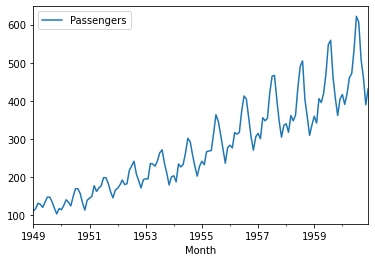

In [12]:
df.plot()

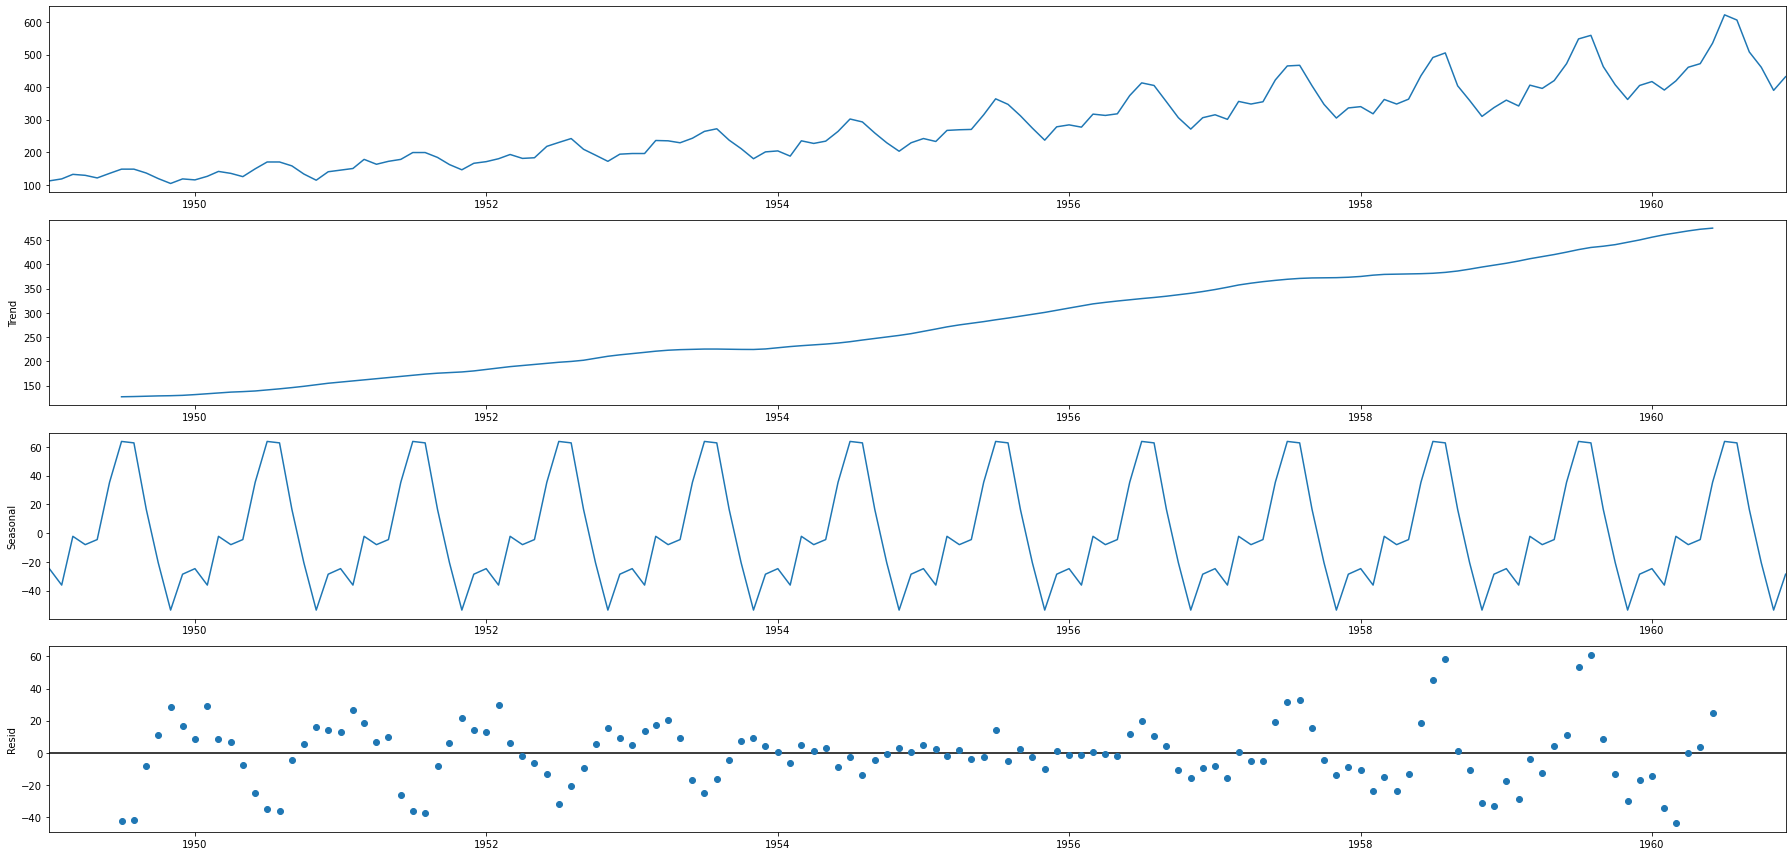

In [30]:
## Decomposing the data
from statsmodels import tsa
from matplotlib import rcParams

rcParams['figure.figsize']=(25,12)

result = sm.tsa.seasonal_decompose(df,model='additive')
result.plot()

plt.show()

In [35]:
## Finding the Moving averages

df['SMA12'] = df.rolling(window=2).mean()
df

,Passengers,SMA12
Month,,
1949-01-01,112,NaN
1949-02-01,118,115.0
1949-03-01,132,125.0
1949-04-01,129,130.5
1949-05-01,121,125.0
...,...,...
1960-08-01,606,614.0
1960-09-01,508,557.0
1960-10-01,461,484.5


<function matplotlib.pyplot.legend(*args, **kwargs)>

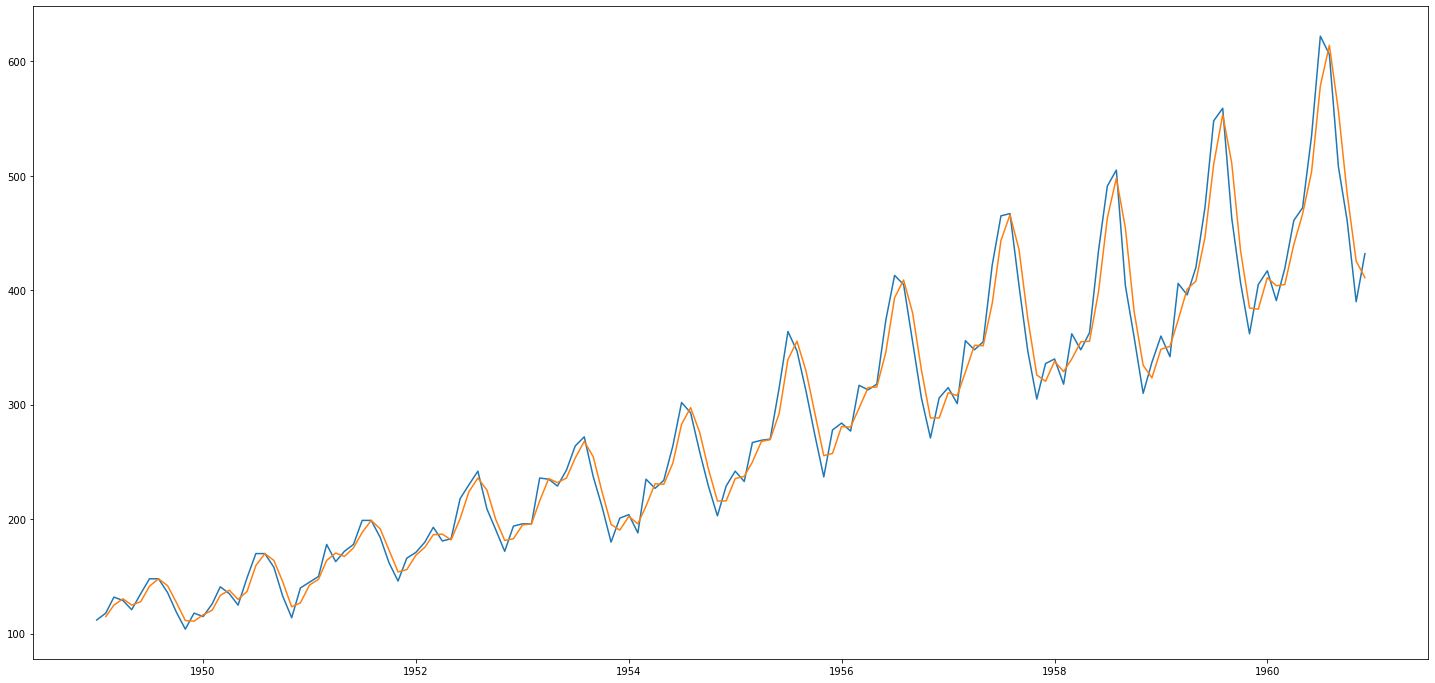

In [38]:
## Comparison of the Moving averages and the actual values

plt.plot(df['Passengers'],label='Passengers')
plt.plot(df['SMA12'],label='SMA12')
plt.legend

In [36]:
## Finding the Mean average prediction error
## ABS((Actual-Predicted)/Predicted)*100


np.mean(np.abs((df['Passengers']-df['SMA12'])/df['Passengers']))*100



4.509723850655714